In [1]:
# Load all dictionaries
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from heatmaps_functions import *

sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [6]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_stim.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_delay.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_resp.xlsx',
              
              'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_close_stim.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_close_delay.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_close_resp.xlsx']

paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_stim.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_delay.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_resp.xlsx',
                    
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_close_stim.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_close_delay.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_close_resp.xlsx']


In [7]:
paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_stim.xlsx', 
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_delay.xlsx', 
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_resp.xlsx',
                  
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_close_stim.xlsx', 
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_close_delay.xlsx', 
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_close_resp.xlsx']

paths_distractor_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_stim.xlsx', 
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_delay.xlsx', 
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_resp.xlsx',
                        
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_close_stim.xlsx', 
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_close_delay.xlsx', 
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_close_resp.xlsx']

In [13]:
df_target=[]
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)

####################

for PathI in paths_target_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[4]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)


In [14]:
df_distractor=[]
df_distractor_shuff=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)

####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[4]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)

In [15]:
#### Hay que substract!

In [16]:
df = pd.concat([df_target, df_distractor])
df['label']= df['item'] + ' ' + df['distance'] 
df['label'] = df['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df.head()

,times,decoding,region,subject,condition,label,item,trained,distance
0,0.000,-6.452111,ips,n001,2_0.2,tf,target,stim,far
1,2.335,-5.357404,ips,n001,2_0.2,tf,target,stim,far
2,4.670,2.072382,ips,n001,2_0.2,tf,target,stim,far
3,7.005,10.049902,ips,n001,2_0.2,tf,target,stim,far
4,9.340,7.811707,ips,n001,2_0.2,tf,target,stim,far


In [17]:
df_shuff = pd.concat([df_target_shuff, df_distractor_shuff])
df_shuff['label']= df_shuff['item'] + ' ' + df_shuff['distance'] 
df_shuff['label'] = df_shuff['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df_shuff.head()

,times,decoding,region,subject,condition,label,item,trained,distance
0,0.000,-0.470339,visual,d001,1_0.2,tf,target,stim,far
1,2.335,-0.465293,visual,d001,1_0.2,tf,target,stim,far
2,4.670,0.306104,visual,d001,1_0.2,tf,target,stim,far
3,7.005,0.230864,visual,d001,1_0.2,tf,target,stim,far
4,9.340,-0.279853,visual,d001,1_0.2,tf,target,stim,far


In [45]:
df.times.unique()

array([ 0.   ,  2.335,  4.67 ,  7.005,  9.34 , 11.675, 14.01 , 16.345,
       18.68 , 21.015, 23.35 , 25.685, 28.02 , 30.355, 32.69 , 35.025])

In [62]:
for cond in ['1_0.2']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for dist in ['close','far']: ##falta el close
                for trained in ['stim', 'delay', 'resp']:
                    for item in ['target', 'dist']:
                        a=1


SyntaxError: invalid syntax (<ipython-input-62-af2222684942>, line 1)

In [65]:
df.loc[(df['region']==reg) & 
         ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
         ( df['condition']==cond) & (df['subject']==subj) &  
         ( df['distance']==dist) & (df['trained']==trained) & 
       ( df['item']==item)]

,times,decoding,region,subject,condition,label,item,trained,distance
4,9.340,-7.745128,pfc,r001,1_0.2,df,dist,resp,far
5,11.675,-5.350101,pfc,r001,1_0.2,df,dist,resp,far
6,14.010,-3.407571,pfc,r001,1_0.2,df,dist,resp,far
7,16.345,-2.103481,pfc,r001,1_0.2,df,dist,resp,far
8,18.680,7.324728,pfc,r001,1_0.2,df,dist,resp,far


In [70]:
df_delay=[]
for cond in ['1_0.2']: #, '1_7', '2_0.2', '2_7']:
    for reg in ['visual']: #, 'ips', 'pfc']:
        for subj in ['d001']: #, 's001', 'l001', 'n001', 'b001', 'r001']:
            for dist in ['close']: #,'far']: ##falta el close
                for trained in ['stim']: #, 'delay', 'resp']:
                    for item in ['target']: #, 'dist']:
                        ####
                        if cond == '1_0.2':
                            dfn = df.loc[(df['region']==reg) & 
                                     ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                                     ( df['distance']==dist) & (df['trained']==trained) & 
                                     ( df['item']==item)]
                            #
                            dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                     ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                                     ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                     ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                     ( df_shuff['item']==item)]
                            
                            ###
                            decoding = dfn.decoding.mean() #option1
                            decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                            ###
                            df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                          item, trained, dist] )
                            #                    
                        elif cond == '2_0.2':
                            dfn = df.loc[(df['region']==reg) & 
                                     ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                                     ( df['condition']==cond) & (df['subject']==subj) &  
                                     ( df['distance']==dist) & (df['trained']==trained) & 
                                     ( df['item']==item)]
                            #
                            dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                     ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                                     ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                     ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                     ( df_shuff['item']==item)]
                            
                            ###
                            decoding = dfn.decoding.mean() #option1
                            decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                            ###
                            df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                          item, trained, dist] )    
                            #
                        elif cond =='1_7':
                            if item=='target':
                                dfn = df.loc[(df['region']==reg) & 
                                         ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                         ( df['condition']==cond) & (df['subject']==subj) &  
                                         ( df['distance']==dist) & (df['trained']==trained) & 
                                         ( df['item']==item)]
                                #
                                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                         ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                         ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                         ( df_shuff['item']==item)]

                                ###
                                decoding = dfn.decoding.mean() #option1
                                decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                                ###
                                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                              item, trained, dist] )   
                            ####
                            elif item=='dist':
                                dfn = df.loc[(df['region']==reg) & 
                                         ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                         ( df['condition']==cond) & (df['subject']==subj) &  
                                         ( df['distance']==dist) & (df['trained']==trained) & 
                                         ( df['item']==item)]
                                #
                                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                         ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                         ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                         ( df_shuff['item']==item)]

                                ###
                                decoding = dfn.decoding.mean() #option1
                                decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                                ###
                                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                              item, trained, dist] )        
                                #
                            #
                        #
                        elif cond =='2_7': ##just the TRs they are "alone"; in 1_ there is coexistance!
                            if item=='target':
                                dfn = df.loc[(df['region']==reg) & 
                                         ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                         ( df['condition']==cond) & (df['subject']==subj) &  
                                         ( df['distance']==dist) & (df['trained']==trained) & 
                                         ( df['item']==item)]
                                #
                                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                         ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                         ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                         ( df_shuff['item']==item)]

                                ###
                                decoding = dfn.decoding.mean() #option1
                                decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                                ###
                                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                              item, trained, dist] )   
                                #
                            elif item=='dist':
                                dfn = df.loc[(df['region']==reg) & 
                                         ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                         ( df['condition']==cond) & (df['subject']==subj) &  
                                         ( df['distance']==dist) & (df['trained']==trained) & 
                                         ( df['item']==item)]
                                #
                                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                         ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                         ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                         ( df_shuff['item']==item)]

                                ###
                                decoding = dfn.decoding.mean() #option1
                                decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                                ###
                                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                              item, trained, dist] )   
                            ####
                            
                       
####

df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item', 'trained', 'distance']


MemoryError: 

In [53]:
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained,distance
0,delay,-2.459816,-2.407634,visual,d001,1_0.2,tc,target,stim,close
1,delay,-0.327494,-0.358727,visual,d001,1_0.2,dc,dist,stim,close
2,delay,-1.191571,-1.089324,visual,d001,1_0.2,tc,target,delay,close
3,delay,-1.066647,-0.960161,visual,d001,1_0.2,dc,dist,delay,close
4,delay,2.862747,2.513012,visual,d001,1_0.2,tc,target,resp,close


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


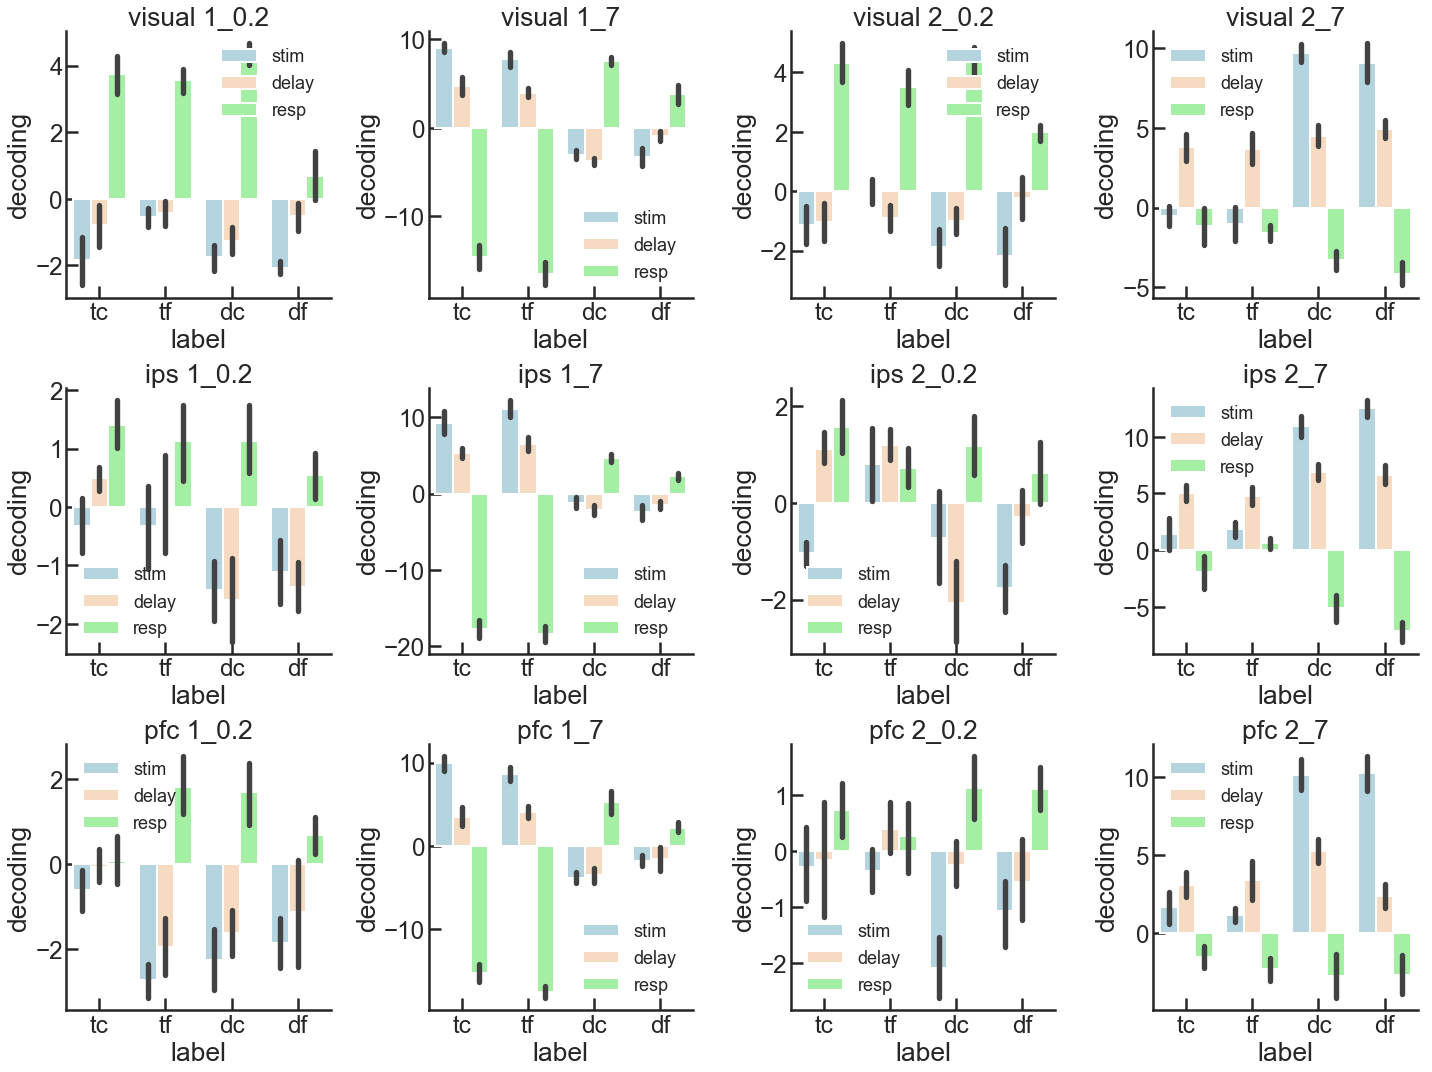

In [54]:
plt.figure(figsize=(20,15))

for idx_a, A in enumerate(['visual', 'ips', 'pfc']):
    for idx_c, C in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
        plt.subplot(3,4, 4*idx_a+idx_c+1)
        sns.barplot(x='label', y='decoding', hue='trained', order=['tc', 'tf', 'dc', 'df'],
                    data=df_delay.loc[(df_delay['condition']==C) & (df_delay['region']==A)], 
                    palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.legend(loc='best', frameon=False, prop={'size': 18})
        plt.title(A + ' ' + C)
        plt.xticks(rotation=0)
        

plt.tight_layout()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


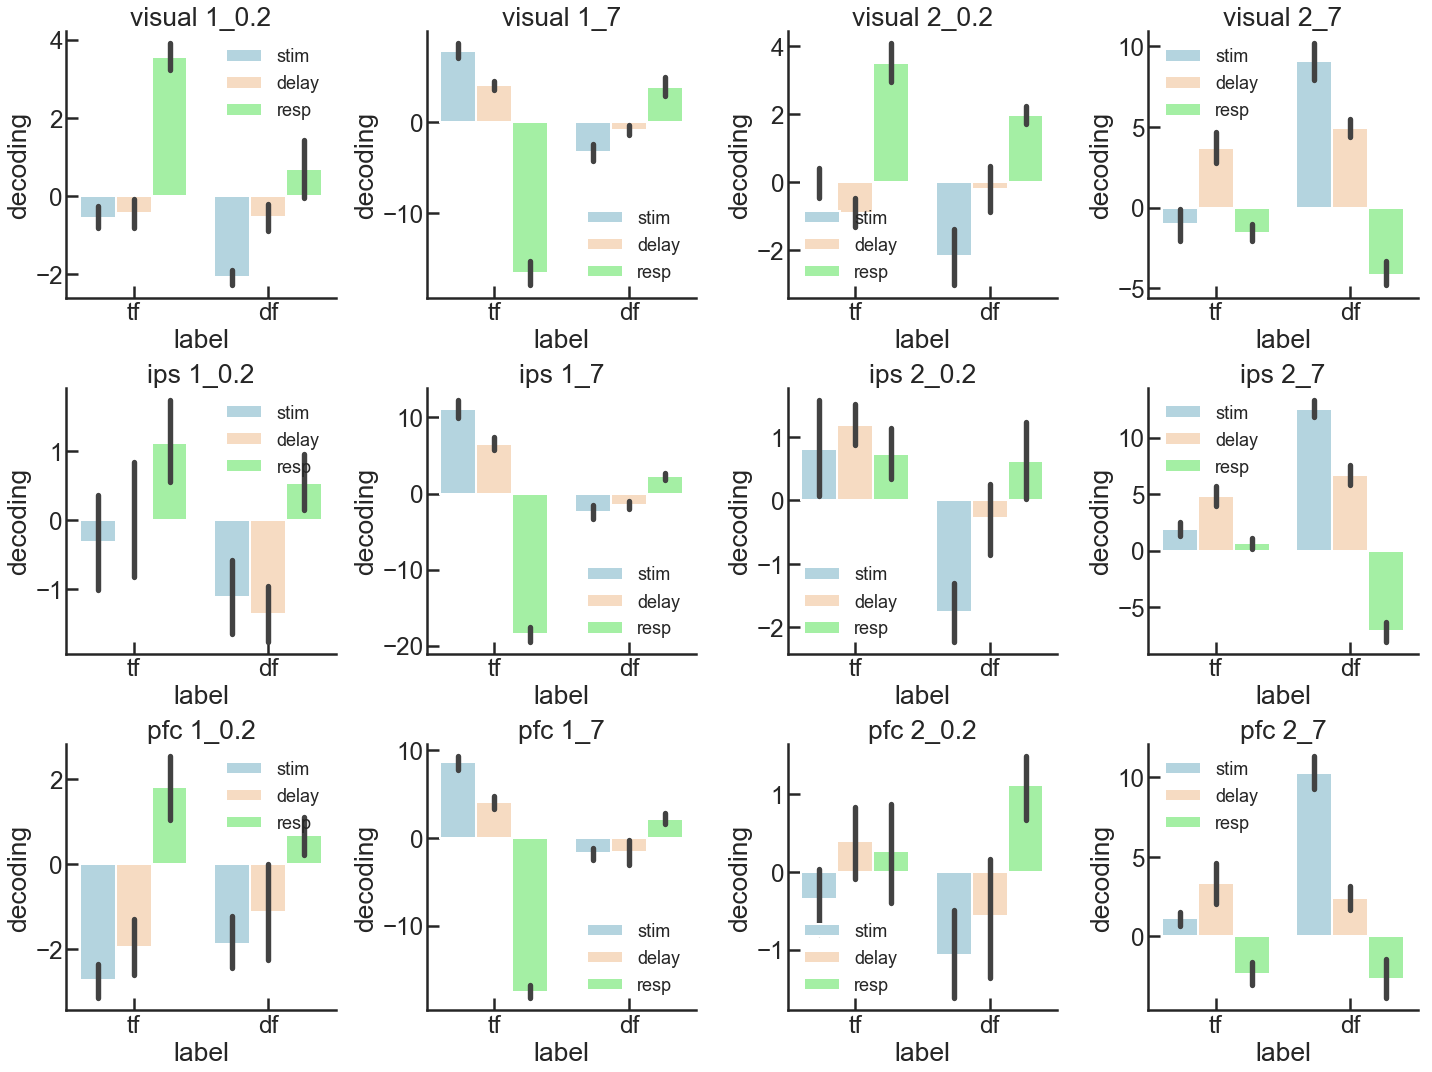

In [55]:
plt.figure(figsize=(20,15))

for idx_a, A in enumerate(['visual', 'ips', 'pfc']):
    for idx_c, C in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
        plt.subplot(3,4, 4*idx_a+idx_c+1)
        sns.barplot(x='label', y='decoding', hue='trained', order=['tf', 'df'],
                    data=df_delay.loc[(df_delay['condition']==C) & (df_delay['region']==A)], 
                    palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.legend(loc='best', frameon=False, prop={'size': 18})
        plt.title(A + ' ' + C)
        plt.xticks(rotation=0)
        

plt.tight_layout()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


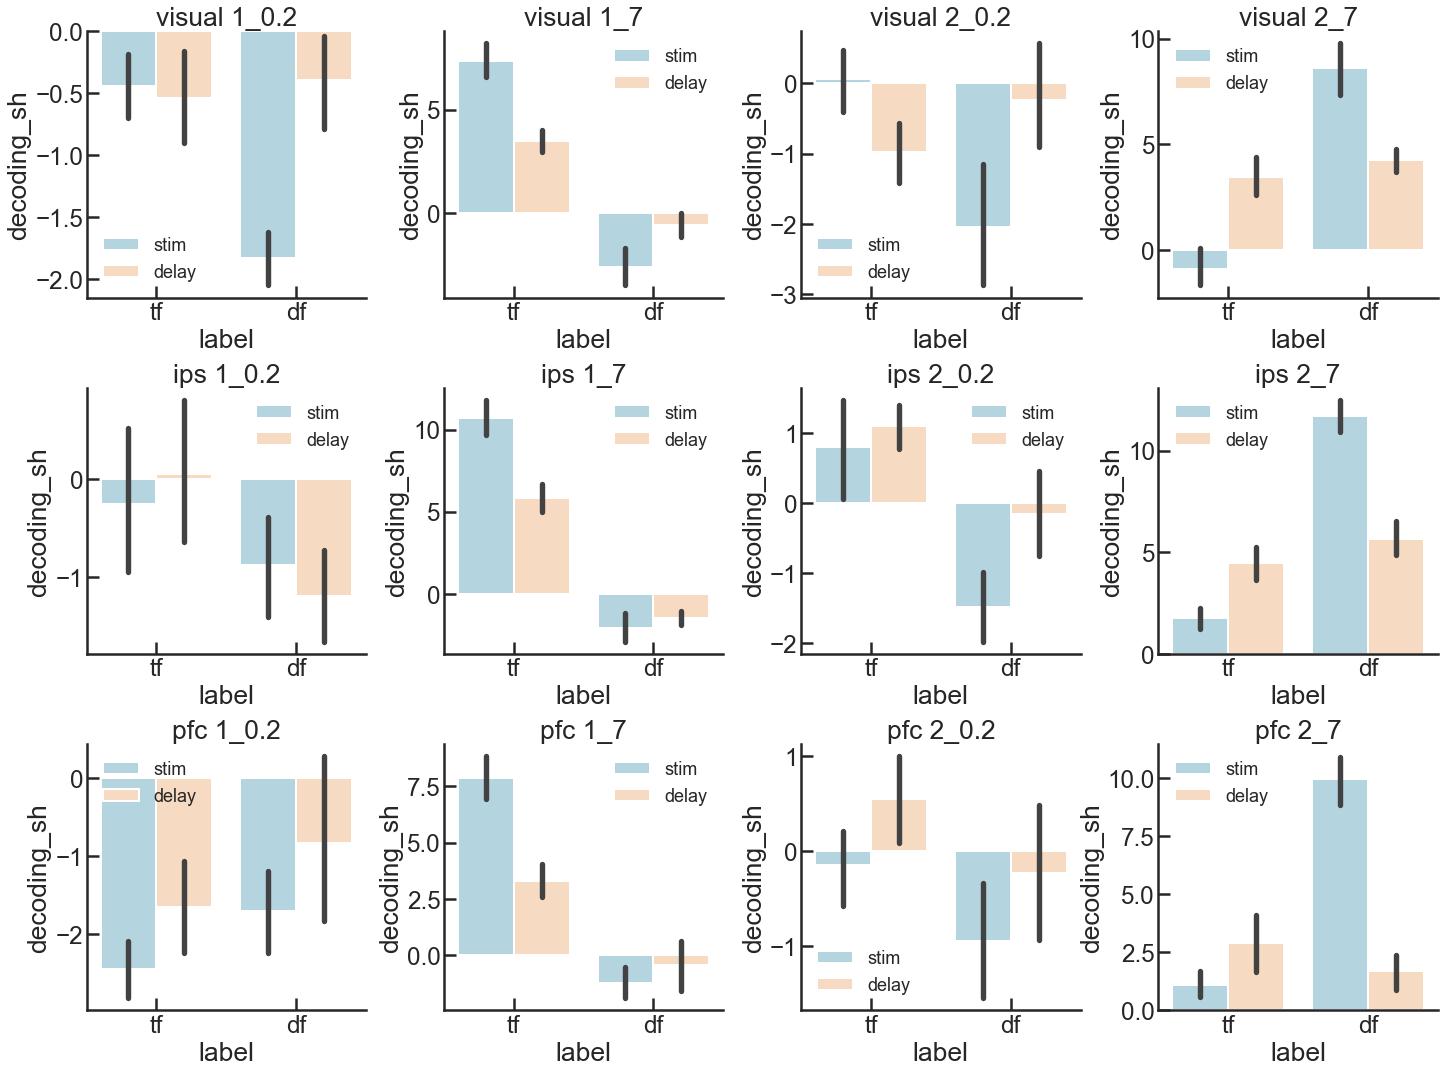

In [56]:
plt.figure(figsize=(20,15))

for idx_a, A in enumerate(['visual', 'ips', 'pfc']):
    for idx_c, C in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
        plt.subplot(3,4, 4*idx_a+idx_c+1)
        sns.barplot(x='label', y='decoding_sh', hue='trained', order=['tf', 'df'], hue_order=['stim', 'delay'],
                    data=df_delay.loc[(df_delay['condition']==C) & (df_delay['region']==A)], 
                    palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.legend(loc='best', frameon=False, prop={'size': 18})
        plt.title(A + ' ' + C)
        plt.xticks(rotation=0)
        

plt.tight_layout()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'target decoding')

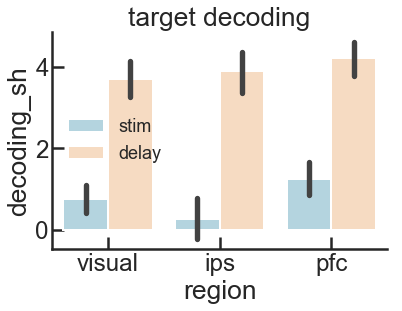

In [39]:
sns.barplot(x='region', y='decoding_sh', hue='trained', order=['visual', 'ips', 'pfc'], hue_order=['stim', 'delay'],
            data=df_delay.loc[(df_delay['item']=='target') & (df_delay['condition']!='1_7')], 
            palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.title('target decoding')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'distractor decoding')

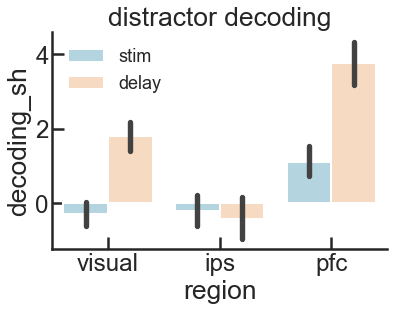

In [38]:
sns.barplot(x='region', y='decoding_sh', hue='trained', order=['visual', 'ips', 'pfc'], hue_order=['stim', 'delay'],
            data=df_delay.loc[(df_delay['item']=='dist') & (df_delay['condition']!='2_7')], 
            palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.title('distractor decoding')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


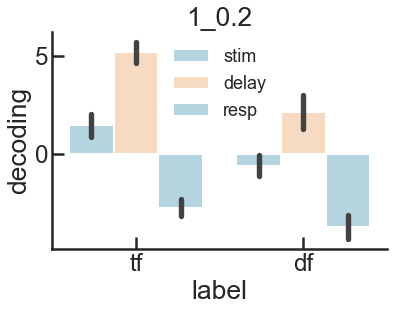

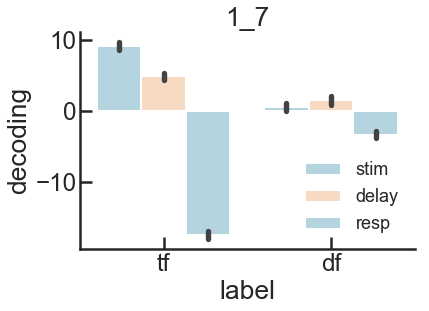

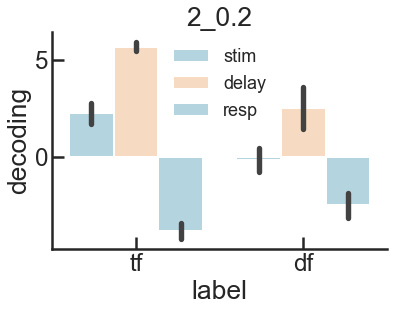

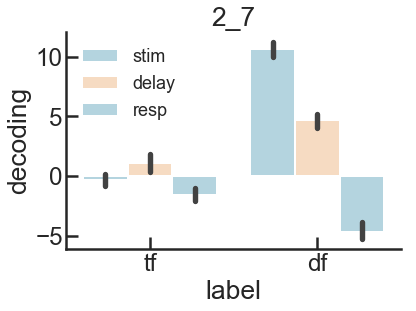

In [61]:
for C in ['1_0.2', '1_7', '2_0.2', '2_7']: 
    sns.barplot(x='label', y='decoding', hue='trained', data=df_delay.loc[df_delay['condition']==C],
                ci=68, palette=['lightblue', 'peachpuff'])
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.legend(loc='best', frameon=False, prop={'size': 18})
    plt.xticks(rotation=0)
    plt.title(C)
    plt.show()

In [18]:
dfn = df.loc[(df['region']=='pfc') &  (df['times']== 9.34 | df['times']== 11.675  ) ]

sns.barplot(x='label', y='decoding', hue='trained', data=dfn, ci=68, palette=['lightblue', 'peachpuff'])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.xticks(rotation=0)
plt.show()


TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [ ]:
## Colapsandolo todo: Condition y area
sns.barplot(x='label', y='decoding', hue='trained', data=df, ci=68, palette=['lightblue', 'peachpuff'])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.xticks(rotation=0)
plt.show()